In [162]:
import numpy as np
import pandas as pd
df = pd.read_csv('References.csv')

In [163]:
df

,Reference_I,Reference_GR,Cluster_Id
0,5941034,1330991508,7.0
1,5940576,1330991512,7.0
2,5940581,1330991506,7.0
3,5941032,1330991507,7.0
4,5941040,1330991510,7.0
...,...,...,...
3995,IV2109017,IV2109017,1.0
3996,IV2109017,IV2109017,1.0
3997,IV2109017,IV2109017,1.0
3998,IV2109019,IV2109019,1.0


In [164]:
df.isnull().sum()

Reference_I      0
Reference_GR     0
Cluster_Id      25
dtype: int64

In [165]:
df = df.dropna()

In [166]:
type(df)

pandas.core.frame.DataFrame

In [167]:
df=df.iloc[:,:].values

In [168]:
df

array([['5941034', '1330991508', 7.0],
       ['5940576', '1330991512', 7.0],
       ['5940581', '1330991506', 7.0],
       ...,
       ['IV2109017', 'IV2109017', 1.0],
       ['IV2109019', 'IV2109019', 1.0],
       ['IV2109042', 'IV2109042', 1.0]], dtype=object)

In [169]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [170]:
le = LabelEncoder()

In [171]:
df[:,0] = le.fit_transform(df[:,0])

In [172]:
df[:,1] = le.fit_transform(df[:,1])

In [173]:
df

array([[1770, 989, 7.0],
       [1766, 993, 7.0],
       [1768, 987, 7.0],
       ...,
       [2407, 2489, 1.0],
       [2409, 2491, 1.0],
       [2414, 2496, 1.0]], dtype=object)

In [174]:
df1=pd.DataFrame(df)
df1

,0,1,2
0,1770,989,7.0
1,1766,993,7.0
2,1768,987,7.0
3,1769,988,7.0
4,1772,991,7.0
...,...,...,...
3970,2407,2489,1.0
3971,2407,2489,1.0
3972,2407,2489,1.0
3973,2409,2491,1.0


In [175]:
df1= df1.rename(columns = {0:'Reference_I',1:'Reference_GR',2:'Cluster_Id'})

In [176]:
df1

,Reference_I,Reference_GR,Cluster_Id
0,1770,989,7.0
1,1766,993,7.0
2,1768,987,7.0
3,1769,988,7.0
4,1772,991,7.0
...,...,...,...
3970,2407,2489,1.0
3971,2407,2489,1.0
3972,2407,2489,1.0
3973,2409,2491,1.0


In [177]:
#Train data
df_X = df1.drop('Cluster_Id',axis=1)

In [178]:
#Test data
df_Y = df1['Cluster_Id']

In [179]:
df_Y = df_Y.astype('int')

In [180]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_X,df_Y,test_size=0.2,random_state=1)

In [181]:
# DECISION TREE:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [182]:
X_train

,Reference_I,Reference_GR
3788,399,380
984,927,970
1848,2582,2659
3330,1697,1992
2253,1988,2146
...,...,...
905,779,822
3839,514,495
1096,775,818
235,990,1815


In [183]:
X_test

,Reference_I,Reference_GR
3762,2846,2918
953,727,771
1881,2533,2611
1751,2253,2338
1408,1632,1867
...,...,...
2655,114,113
2418,1109,1357
1195,2756,2832
3346,968,1210


In [184]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 3788 to 1061
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Reference_I   3180 non-null   object
 1   Reference_GR  3180 non-null   object
dtypes: object(2)
memory usage: 74.5+ KB


In [185]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [186]:
#Prediction - Decision tree
Y_pred=dtc.predict(X_test)

In [187]:
Y_pred

array([ 1,  1,  1,  9,  1,  1,  1, 10,  1,  1,  6,  1,  1,  1,  1,  1,  1,
        1, 10,  1,  1,  1,  1,  1,  4,  1,  1,  2,  1,  1,  1,  1,  9,  1,
        1,  1,  1,  1,  1, 10,  7,  1,  1,  1,  7,  8,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 11,  1,  3, 10,  8,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  6,  1,  1,  1, 10,  1,  7,  7,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  7, 10,  1,  1,  1,
       10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  7,  1,  1,  1,  9,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,
        7,  1,  1,  7,  1,  7,  1,  1,  1,  1,  1,  1,  7,  1,  1,  1,  1,
        1,  1,  7,  8,  1,  1,  1,  6,  7,  1,  1,  1,  1,  7,  1,  1,  1,
        7,  2,  1,  1,  8,  7,  4,  1,  1,  1,  4,  9,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  2,  1,  6,  1,  1,  1,  1,  1,  1,  1,  1,  7,  1,
       12,  1,  1,  1,  1

In [188]:
#Accuracy score of Decision Tree
from sklearn.metrics import accuracy_score
dtc_ac=accuracy_score(Y_test,Y_pred)
dtc_ac

0.9786163522012579

In [189]:
#K-Nearest Neighbors:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [190]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [191]:
#Prediction - K-Nearest Neighbors
Y_pred=knn.predict(X_test)

In [192]:
Y_pred

array([ 1,  1,  1,  9,  1,  1,  1, 10,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1, 10,  1,  1,  1,  1,  1,  4,  1,  1,  2,  1,  1,  1,  1,  9,  1,
        1,  1,  1,  1,  1, 10,  7,  1,  1,  1,  7,  8,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 11,  1,  3, 10,  8,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  6,  1,  1,  1, 10,  1,  7,  7,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  7, 10,  1,  1,  1,
       10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  7,  1,  1,  1,  9,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,
        7,  1,  1,  7,  1,  7,  1,  1,  1,  1,  1,  1,  7,  1,  1,  1,  1,
        1,  1,  1,  8,  1,  1,  1,  6,  7,  1,  1,  1,  1,  7,  1,  1,  1,
        7,  2,  1,  1,  2,  7,  4,  1,  1,  1,  4,  9,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  2,  1,  6,  1,  1,  1,  1,  1,  1,  1,  1,  7,  1,
       12,  1,  1,  1,  1

In [193]:
#Accuracy score of K-Nearest Neighbors
knn_ac=accuracy_score(Y_test,Y_pred)
knn_ac

0.979874213836478

In [194]:
# Logistic Regression:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [195]:
lr.fit(X_train,Y_train)

C:\Users\sthar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [196]:
#Prediction - Logistic Regression
Y_pred=lr.predict(X_test)

In [197]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1,
       1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 1, 1, 1,
       7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 7, 7, 4, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 7, 1, 7, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 7, 1, 1, 1, 1, 7, 1, 1, 1, 7, 1, 1, 1, 7, 7, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7,
       1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [198]:
lr_ac=accuracy_score(Y_test,Y_pred)
lr_ac

0.8654088050314466

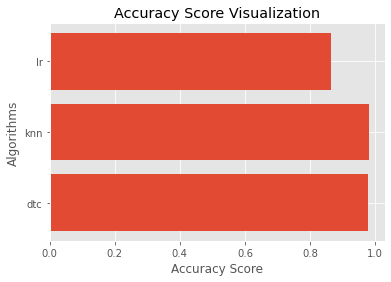

In [199]:
import matplotlib.pyplot as plt
x=['dtc','knn','lr']
height=[dtc_ac,knn_ac,lr_ac]
plt.style.use('ggplot')
plt.barh(x, height)
plt.xlabel("Accuracy Score")
plt.ylabel("Algorithms")
plt.title('Accuracy Score Visualization')
plt.show()

In [200]:
#Finalized Algorithm
Y_pred=knn.predict(X_test)

In [201]:
Y_pred

array([ 1,  1,  1,  9,  1,  1,  1, 10,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1, 10,  1,  1,  1,  1,  1,  4,  1,  1,  2,  1,  1,  1,  1,  9,  1,
        1,  1,  1,  1,  1, 10,  7,  1,  1,  1,  7,  8,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 11,  1,  3, 10,  8,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  6,  1,  1,  1, 10,  1,  7,  7,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  7, 10,  1,  1,  1,
       10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  7,  1,  1,  1,  9,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,
        7,  1,  1,  7,  1,  7,  1,  1,  1,  1,  1,  1,  7,  1,  1,  1,  1,
        1,  1,  1,  8,  1,  1,  1,  6,  7,  1,  1,  1,  1,  7,  1,  1,  1,
        7,  2,  1,  1,  2,  7,  4,  1,  1,  1,  4,  9,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  2,  1,  6,  1,  1,  1,  1,  1,  1,  1,  1,  7,  1,
       12,  1,  1,  1,  1

In [202]:
df_predict = pd.DataFrame(Y_pred, columns=['Predicted Cluster ID'])

In [203]:
df_predict

,Predicted Cluster ID
0,1
1,1
2,1
3,9
4,1
...,...
790,1
791,1
792,1
793,1


In [204]:
Y_test

3762    1
953     1
1881    1
1751    9
1408    1
       ..
2655    1
2418    1
1195    1
3346    1
3782    1
Name: Cluster_Id, Length: 795, dtype: int32

In [205]:
df_new = pd.DataFrame(Y_test)

In [206]:
df_new

,Cluster_Id
3762,1
953,1
1881,1
1751,9
1408,1
...,...
2655,1
2418,1
1195,1
3346,1


In [207]:
df_predict['Cluster_Id'] = df_new['Cluster_Id'].values

In [208]:
df_predict

,Predicted Cluster ID,Cluster_Id
0,1,1
1,1,1
2,1,1
3,9,9
4,1,1
...,...,...
790,1,1
791,1,1
792,1,1
793,1,1


In [209]:
df_predict.to_excel('Predicted_Output.xlsx', index =False)